# Clustering
Clustering is: unsupervised machine learning, discrete classification, data visualization.

Links: [Tutorial](https://matteucci.faculty.polimi.it/Clustering/tutorial_html/index.html) from Italy.
[sklearn](https://scikit-learn.org/stable/modules/clustering.html) index of all algorithms.
[sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) comparison on toy datasets.

Clustering types:
* agglomerative (start small and join)
* partition (start big and split)
* hierarchical (parent/child clusters)

Clustering metrics: 
* single-linkage clustering (min)
* complete-linkage clustering (max)
* average-linkage clustering
* sum of squared Euclidean distances from the cluster center 

Cluster centers:
* Centroid = mean = point in space (easier to compute, sensitive to outliers)
* Medoid = data instance with minimal sum of dissimilarity to all others (does not require a distance metric)

## Agglomerative Hierarchical Clustering
Bottom-up.
Start with each point a cluster.
Always join two clusters that would minimize the increase in within-cluster variance. 

Scales well. Works with any distance metric, even non-Euclidean ones. Can choose num clusters interactively.  

SciKit-Learn tools: 
* [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) 
AgglomerativeClustering. Linkage=Ward is the default.
You can set the stopping criteria by #clusters or a distance threshold. You can access attributes like #clusters, #leaves, #features used, and #connected components.    
* [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html#sklearn.cluster.FeatureAgglomeration) 
FeatureAgglomeration can cluster features for dimensionality reduction.

## Ward's Method
One kind of agglomerative hierarichal. Also called minimum-variance.

Ward's method is very popular though he barely proposed it. 
Ward described clustering as minimizing an objective function.
He gave an example function that is now called Ward's Linkage.
[Wikipedia](https://en.wikipedia.org/wiki/Ward%27s_method)

The objective function: minimize the SSE i.e. sum of the squares of the Euclidean distances.

Ward's is similar to ANOVA which also measures SSE of within-group variance. 

Whereas K-means sums distances of all points to a centroid (point in space),
Ward sums distances of points to each other.

## K-Means Clustering  
Partition clustering. K-means is easy to use and understand.

Algorithm: Given K and a stopping criteria. Choose K initial centroids randomly. Form K clusters by assiging every data instance to its closest centroid. For each cluster, recompute the centroid and repeat till the stopping criteria is met.

The input K directly controls the number of clusters obtained. 
Why not compute the optimal K?
Suppose the objective function is to minimize within-group variance.
The more clusters, the lower the variance.
And at K=N clusters for N data points, variance is zero.
So we need additional constraints.

This heuristic algorithm uses hill climbing from K random initial points.
The results are very sensitive to the initializers. Recommend repeat trials.

The objective function minimimizes sum of squared norms of deviations from the cluster mean. 
The norm is usually Euclidean disatance.
This creates a bias for spherical clusters of similar size.
The cluster decision boundaries form a Voronoi tesselation of the space.
The algorithm performs poorly when true clusters are not convex 
or have dissimilar size or shape. Recommend preprocessing.

The algorithm requires computing all-vs-all distances on every round.
There are some optimizations to avoid all-vs-all.
The computation can fail on cluster size 1 (zero variance) or cluster size 0 (singularity).
However, the compute is usually fast. 

K-means is heuristic. 
K-means is not optimal; it finds a local optimum. 
In particular, once it merges two real clusters,
those clusters will never separate.

K-means is a discrete form of the expectation maximization algorithm.
In K-means, each data point is assigned to one cluster.
In classic (continuous) EM, each data point is partially explained by each cluster.
EM would find concentric clusters with different variance, but not K-means.

The similarity measure could be: 
Manhattan, Euclidean, cosine, correlation, Hamming (for bit vectors).
Some measures require normalizing all points to zero mean, unit standard deviation.
Some measures are true distance metrics, but some are not.
The measures above are linear, which is why K-means finds convex shapes.
For non-convex shapes, use Kernel K-means i.e. a non-linear metric.

For continuous features, use feature means to find centroids.
For categorical features, use feature modes to find centroids.

The K-means algorithm with centroids is sensitive to outliers.
For tighly clumped data, centroids (points in space) are best.
For dispersed data, medoids (actual data points) reduce sensitivity to outliers.
Note that a centroid may sit in the empty space between real clusters, 
or it may be drawn outside of a real cluster by an outlier.

K-means algorithms:
* Lloyd. This is the standard algorithm. 
On every iteration, it recomputes the Euclidean distance 
between every data point and every mean.
* Elkan. The Elkan optimization uses triangle inequality between triplets
to avoid some recomputes. 
Simiplified explanation:
Say points 1 and 2 were not assigned to cluster X, and
point 1 was even further than point 2 from mean X. 
Assume mean X moved just a little on this iteration.
If you determine that point 2 is still not going to join cluster X,
you are fairly certain point 1 won't join cluster X either.

SciKit-Learn:
* [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans).
The sklearn class runs K-means 10 times (settable) 
on different initializers.
The initializer parameter can be 'random', 'kmeans++',
or an array of means & weights.
Using random is fastest but gives worst results. 
The weights give the means different amounts of inertia,
so the heaviest mean is least likely to move a lot.
* The algorithm is settable: Lloyd or Elkan (see my text above).
* [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans) is for large data. 
This re-estimates means on small batches rather than all the data.

Links: Caltech lecture [Ciro Donalek](https://youtu.be/YifY5uVRWTk)

### Choosing initializers
K-means is sensitive to the initial K means, chosen randomly.

One work-around is to try several reruns with different random initializers.

Another work-around is to start with large K,
but prune points that are close to other points.

Kmeans++ is a more principled work-around.
It chooses random points that are not close to each other
and are reflective of the data distributon.
Kmeans++ has guarrantee of coming within log() of the optimum.
The algorithm was in a tech note [Kmeans++](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)
from Stanford! 

### Choosing K: BIC, etc
The choice of K is heuristic, but here are some aids. 
* Information criteria: BIC, AIC, DIC. 
These combine a likelihood function which maximizes K, 
plus a penalty for model complexity, which minimizes K.
* Calinksi-Harabasz or Davies-Bouldin Criterion use 
between vs within variance after trying multiple K.


### Bisecting K-means
Recursive partitioning variant of K-means. 

Choose a small K. 
Split all the data in K clusters by normal K-means clustering.
Then choose one of those clusters, and split it by the same algorithm. 
Iterate till all clusters are small enough.

There are various strategies for choosing the next cluster to split e.g. max points, max diameter, max SSE.

Stop if a cluster is too small.
This algorithm never generates empty clusters. 

This runs faster than regular K-means because 
all-vs-all distances are computed on data subsets (except the first time).
So this is preferred on big data.

Compared to K-means with random initializers,
this is more likely to discover the data's natural hierarchy, and
less likely to generate a cluster of unrelated points.
However, this underperforms compared to 
K-means with Kmeans++ initializer.

SciKit-Learn:
* [BisectingKmeans](https://scikit-learn.org/dev/modules/generated/sklearn.cluster.BisectingKMeans.html)
is not yet released.
For now, you must install developer pre-release, ver 1.1. 
* This class has the same fields and methods as Kmeans. 
* You can set the bisection strategy to 
always choose the cluster with max(#points) or max(SSE). 
See [sklearn](https://scikit-learn.org/dev/auto_examples/cluster/plot_bisect_kmeans.html) to compare Kmeans with Bisecting Kmeans.

## Gaussian Mixture Models
See [YouTube](https://youtu.be/qMTuMa86NzU) video from UC Irvine.

Assume the data were generated by
* K: A given number of Gaussian distributions
* $\mu_i$: Each Gaussian has a mean (cluster position)
* $\Sigma_i$ Each Gaussian has a variance (univariate bell curve) or covariance (multivariate elipsoid) 
* $\pi_i$: Each Gaussian has a weight (i.e. probability or portion of the data)

Estimate the GMM parameters by EM i.e. guessing plus hill climbing. Each epoch uses maximum likelihood estimates (MLE) to find the new mean and variance. 
* Guess some initial parameters for K Gaussians
* E-Step: for every point, make a pie chart of Gaussian responsibility
* M-Step: for every Gaussian, update its weight, mean, covariance
* Repeat till convergence to a local optimum (or a singularity prevents further computation)

EM maximizes the objective function, which is the product of the weighted probabilities of all points, or equivalently the log likelihood of the model, which is the the sum of the logs of the weighted probabilities of all points. 

K-means is a degenerate case of GMM
* Both require parameter K, the number of clusters or Gaussians, and both can make use of regularization to penalize high K, and BIC or cross-validation to find a good value
* Both compute the centroids or Guassian means, but only GMM could find concentric ones
* K-means assumes circular clusters (covariance=0) but GMM assigns each cluster an elipsoid shape and orientation (covariance)
* K-means assumes clusters of equal size but GMM assigns each cluster a probability
* K-means assigns every point to exactly 1 cluster but GMM assigns every point to every cluster with some probability

## Mean Shift Segmentation
Partition clustering algorithm. Hill climbing. Used for image segmentation.

Mean shift finds modes, assuming the data were generated by kernels, usually Gaussian.
Mean shift discovers the number of modes.
Mean shift is sensitive to its parameter: bandwidth aka radius.
Unfortunately, mean shift splits bimodal clusters.

Mean Shift does not require parameter K for the number of clusters.
Mean Shift requires a bandwidth parameter for the radius around each point.
From each data point, it finds a cluster representative.
Many points lead to the same cluster representative.
From all points, it finds K cluster representatives.

Algorithm: 
Process every data point in serial or parallel.
Each point P is its own centroid C initially.
Identify all points within radius of P, estimate the (multivariate) mean (center of mass), and shift the centroid, repeat.
Repeat till convergence, assign P to C, then move on to the next point.
Naturally, nearby points converge to the same centroid, and the number of centroids decreases.
The clusters won't be speherical or convex, but they will be contiguous.

Mean shift requies all-vs-all distances.
Mean shift is slow but parallelizable. 

The main parameter is bandwidth
i.e. the diameter of circle around each point.
Other parameters are threshold (stopping criteria)
and kernel.
For flat kernel, consider all points equally for center of mass.
For gaussian kernel, weight closer points more.

## Evaluating clusters
### evaluation method 1, using labeled data.

Plot values of K on the X-axis. 
Plot the SSE on the Y-axis. 
Choose K near an elbow.

### evaluation method 2, using unlabeled data.

This is called Silhouette, a term for describing knife blades. 
In a good cluster, every data point is close to every other,
and most of its points are closer to each other than to members of other clusters.
* A(i) = average distance from i to other points in this cluster.
* B(i) = average distance between this cluster and nearest other cluster.
* S(i) = (B - A)/max(A,B).

Normalize S to range +1 to -1.
Thus, +1 means a point is like this cluster and unlike any other cluster.

Within each cluster, draw S(i) as horizontal bar chart, sorted with longest on top.
These form knife edges.
Long, wide blades have many bars are near 1, indicating good clusters.
Pointy narrow blades have only a few long bars. 
Short blades have no long bars, indicating poor clusters.

## Self Organizing Maps (SOM)
Also called Kohonen Maps. Non-linear PCA.

Dimensionality reducton. Used as preprocessor before clustering. Helps K-means when true clusters have non-convex, non-linear shapes.

SOM will not identify the clusters
but it will make them easier to find or visualize.
SOM maps high dimensional data to a lower dimensional map such as a 2D grid.
Its map preserves distances such that clusters remain clustered.
Then, it uses hill climbing to adjust the mapping.

Input K = number of units. Choose a grid geometry (square or hex). 
Choose initial cluster centers.
Yes, the algorithm is sensitive to these values.

SOM starts with a grid of K cells called units. 
It us usually a 2D grid that is either rectangular (every unit has 8 neighbors)
or hexogonal (every unit has 6 neighbors).
Initialize each unit with
its position on the 2D grid, called the grid space attribute. 
Also initialize each unit with an initial cluster representative,
called the feature space attributes, weights, codes, or prototype vectors.
Later, assign data points to one unit each.

The results are sensitive to the initializers.
The initial feature space attributes can be random values,
or random samples from the data,
or intelligently distributed values e.g. 
sampled along the data's principal eigenvectors.

Define each unit's neighborhood radius within the grid space. 
Usually, the radius increases over time.
When neighborhood includes only one unit, 
then the algorithm reduces to K-means.
Commonly, the neighborhood includes the 8 or 6 direct neighbors.
If the neighborhoods are larger,
then use a gaussian kernel to weight neighbors by distance.

In each epoch, process every data point.
* For each data point, compute the distance between its vector 
and each prototype vector.
Find the Best Matching Unit (BMU) per data point.
* Select the point's BMU neighborhood in grid space. 
For each unit in this neighborhood,
shift its feature space attributes to match the data point.
The BMU will shift the most (shrink toward the point),
while adjacent neighbors shift less (stretch slightly),
and distant neightbors shift the least.

Update rule:   
* $i$ is the unit whose weight $w_i$ we are updating
* $x$ is the data point proccessed at time $t$ 
* $bmu(x)$ is its best matching unit
* $A_t$ is the learn rate (decreases over time)
* $H_t$ is the neighborhood proximity function (increases over time)

$w_i(t+1)=w_i(t)+A_t*H_t(i,bmu(x))*[x-w_i(t)]$  

After training, natural clusters in the data
will induce corresponding clusters in the map.
The results are visualized with heatmaps.
Color each unit with pie chart (relative importance) of all features to look for important features.
Color each unit by one data feature to test for clustering by this feature. 
Color by a second feature to test for correlation.
Color each unit by its number of points to see cluster uniformity. 
Color each unit by neighbor distances to spot outliers.

The SOM units can be organized by hieirarchical clustering.

Goodness of fit:   
* Quantization error measures distance of each data point to its BMU.
* Topographic error measures portion of 2nd-best units that are not adjacent to the BMU.
* Movies can show the data points' trajectories through SOM during training.

SciKit-Learn has no SOM implementation.
Confusingly, some Bozo named his tool [sklearn-som](https://github.com/rileypsmith/sklearn-som).

# Examples
SciKit-Learn agglomerative clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
#np.random.seed(0)

In [2]:
# Here are some standard data sets.
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Here are some nice colors for showing clusters
COLORS = np.array(["#377eb8","#ff7f00","#4daf4a","#f781bf","#a65628","#984ea3","#999999","#e41a1c","#dede00"])

In [3]:
# Simple wrapper for AgglomerativeClustering.
def make_clusters(XY, num_clusters=None):
    X = XY[0]
    Y = XY[1]
    alg = cluster.AgglomerativeClustering()
    if num_clusters is not None:
        alg = cluster.AgglomerativeClustering(num_clusters)  
        ## with no setting, it converges on 2
    alg.fit(X)
    ypred = alg.labels_
    print('#clusters',alg.n_clusters_,'cluster assignments per point',alg.labels_)
    plt.scatter(X[:, 0], X[:, 1], color=COLORS[ypred])
    plt.show()

#clusters 2 cluster assignments per point [1 1 1 0 0 0]


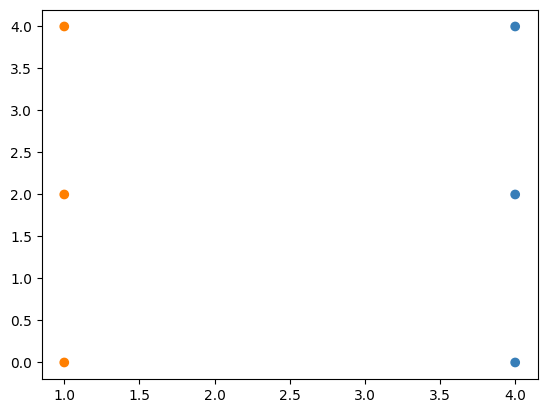

In [4]:
# This simple example demonstrates success.
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
Y = [0,0,0,1,1,1]
make_clusters( (X,Y) )

#clusters 2 cluster assignments per point [0 0 1 ... 0 0 1]


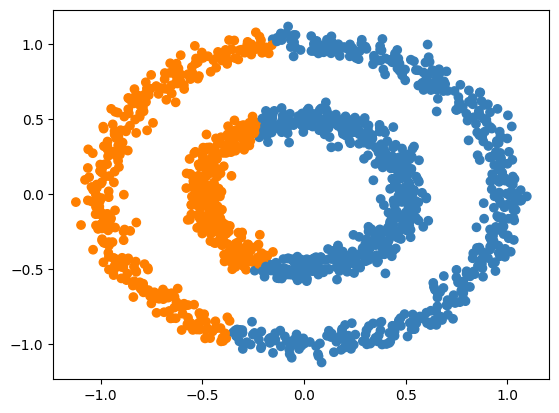

In [5]:
# This failed example demonstrates risk of using Euclidean distance.
make_clusters(noisy_circles)

#clusters 3 cluster assignments per point [2 2 2 ... 2 1 1]


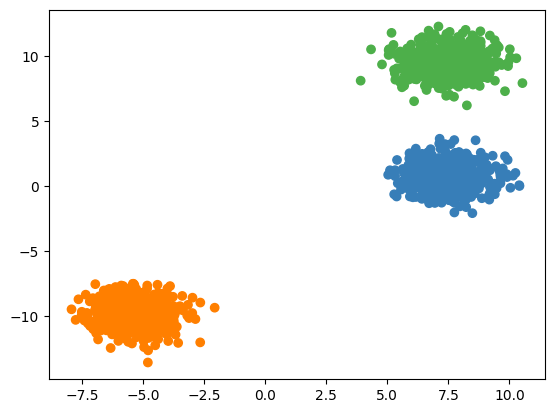

In [6]:
# This example shows success with K=2 or K=3.
make_clusters(blobs,3)  

#clusters 5 cluster assignments per point [0 0 1 ... 0 2 1]


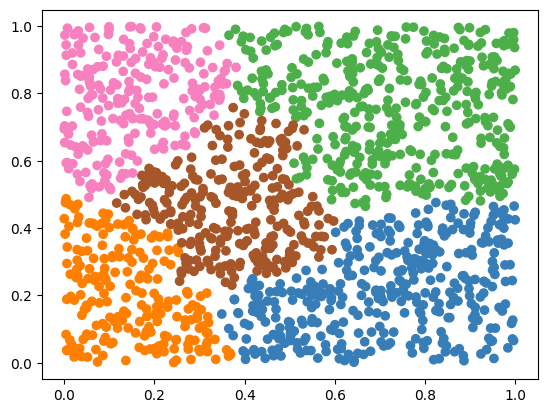

In [7]:
# When the data don't have natural clusters,
# the algorithm might partition the data into equal-size clusters.
make_clusters(no_structure,5)